In [3]:
import json
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv('kc_house_data.csv')


In [238]:
# del df['waterfront']

In [239]:
# del df['date']

In [240]:
# del df['yr_renovated']

In [241]:
# del df['view']

In [242]:
# del df['lat']

In [243]:
# del df['long']

In [244]:
# del df['zipcode']

In [245]:
# del df['id']

In [246]:
# df.fillna(0)

In [247]:
import statsmodels.api as sm
X = df["price"]
y = df["condition"]
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              condition   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                          4.307e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        17:00:59   Log-Likelihood:                         -45680.
No. Observations:               21597   AIC:                                  9.136e+04
Df Residuals:                   21596   BIC:                                  9.137e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price       4.336e-06   2.09e-08    207.528      0.000     4.3e-06    4.38e-06
==============================================================================
Omnibus:                    16289.839   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           679466.531
Skew:                          -3.223   Prob(JB):                         0.00
Kurtosis:                      29.712   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
y = df[["price"]]
X = df.drop(["id", "zipcode", "lat", "long", "date", "waterfront", "sqft_basement"], axis=1)

scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

In [249]:
X = X.fillna(0)

In [250]:


# Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [251]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[[ 7.62200000e+06 -1.82256402e-09 -1.77244927e-09  4.24699745e-10
  -1.50385659e-09  6.78076632e-10 -9.94443498e-10 -2.65573663e-10
  -9.77087061e-10 -4.99287512e-10 -2.21447769e-11 -8.26310677e-10
  -4.87867276e-11 -3.68143240e-10]]
Unpenalized Linear Regression Intercept:[78000.]


In [252]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[ 7.62174152e+06  0.00000000e+00  2.55727811e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.82594232e+00  0.00000000e+00
  2.93360132e+01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Lasso Linear Regression Intercept:[78000.86968186]


In [253]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[[ 7.36924956e+06 -4.07069364e+04  1.25998367e+04  6.83943736e+04
   5.47071616e+02  2.17255039e+03  9.42965916e+03  2.80584163e+03
   3.98380570e+04 -2.35322140e+02 -1.36746475e+04  1.38698616e+03
   4.74461229e+03 -1.57034499e+04]]
Ridge Linear Regression Intercept:[70851.1936952]


In [254]:
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(17277,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(4320,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [255]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model price    9.269703e+11
dtype: float64
Test Error Ridge Model price    2.328463e+11
dtype: float64


Train Error Lasso Model price    1.666051e+06
dtype: float64
Test Error Lasso Model price    409873.430206
dtype: float64


Train Error Unpenalized Linear Model price    2.058969e-15
dtype: float64
Test Error Unpenalized Linear Model price    5.231036e-16
dtype: float64


In [256]:




housing_predictors = X.iloc[:,0:15]
corr = housing_predictors.corr()



In [266]:
#creating alternate dataframe to convert zipcode to dummy variables
df_dummies = pd.get_dummies(df, prefix = 'zipcode_', columns = ['zipcode'])

In [258]:
df_dummies = pd.get_dummies(df, prefix = 'waterfront_', columns = ['waterfront'])

In [259]:
housing_predictors.iloc[:,:15]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.018880,0.06250,0.066667,0.061503,0.003108,0.0,0.00,0.50,0.4,0.089602,0.478261,0.000000,0.161934,0.005742
1,0.060352,0.06250,0.233333,0.167046,0.004072,0.4,0.00,0.50,0.4,0.199115,0.443478,0.988089,0.222165,0.008027
2,0.013382,0.03125,0.066667,0.030372,0.005743,0.0,0.00,0.50,0.3,0.044248,0.286957,0.000000,0.399415,0.008513
3,0.069011,0.09375,0.333333,0.120729,0.002714,0.0,0.00,1.00,0.4,0.075221,0.565217,0.000000,0.165376,0.004996
4,0.056678,0.06250,0.200000,0.099468,0.004579,0.0,0.00,0.50,0.5,0.144912,0.756522,0.000000,0.241094,0.007871
5,0.151141,0.09375,0.533333,0.383447,0.061429,0.0,0.00,0.50,0.8,0.389381,0.878261,0.000000,0.750473,0.116339
6,0.023550,0.06250,0.233333,0.102126,0.003816,0.4,0.00,0.50,0.4,0.148783,0.826087,0.000000,0.316469,0.007085
7,0.028057,0.06250,0.133333,0.052392,0.005567,0.0,0.00,0.50,0.4,0.076327,0.547826,0.000000,0.215281,0.010407
8,0.019877,0.06250,0.066667,0.107062,0.004210,0.0,0.00,0.50,0.4,0.075221,0.521739,0.000000,0.237653,0.008572
9,0.032144,0.06250,0.266667,0.115414,0.003659,0.4,0.00,0.50,0.4,0.168142,0.895652,0.000000,0.342626,0.007948


In [260]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.393497,0.036056,0.667951,0.605368,0.053953,0.117855,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.026496,0.356563,0.479386,0.155670,0.017900,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,0.507173,0.047177,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,0.318152,0.051060,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,-0.008830,0.114731,0.184139,0.052946,0.004979,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,-0.264075,0.458794,0.523989,0.489193,0.003793,0.280102,-0.010722
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,-0.054452,0.090339,0.278928,0.073083
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.055808,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,0.447865,0.015623,0.713867,0.120981
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,-0.158904,0.756073,1.000000,0.424037,0.020645,0.731767,0.195077


In [261]:
corr[abs(housing_predictors.corr() > 0.75)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,1.000000,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,0.755758,1.000000,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,0.756402,NaN
sqft_lot,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,NaN,NaN,0.762779,NaN,NaN,NaN,NaN,1.000000,0.756073,NaN,NaN,NaN,NaN
sqft_above,NaN,NaN,NaN,0.876448,NaN,NaN,NaN,NaN,0.756073,1.000000,NaN,NaN,NaN,NaN


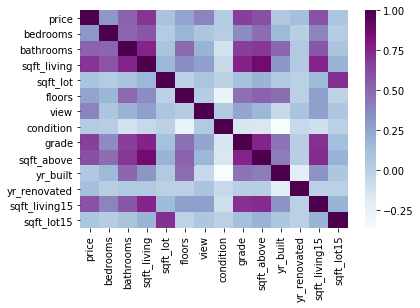

In [262]:
sns.heatmap(corr, cmap = "BuPu")


In [263]:
# X.to_csv(r'/Volumes/S190813/Coding/flatiron/Another_Crime_project/KyleMattworking_data.csv')

In [264]:
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd



X = df[['view','bathrooms', 'grade', 'zipcode']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [265]:
# Graph done in other notebook, prescale

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D


# # graph the data
# fig = plt.figure(1)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df["view"], df['price'], df["grade"])
# ax.set_xlabel('view')
# ax.set_ylabel('price')
# ax.set_zlabel('grade')


# # calculate the r-squared
# rSquared = .512
# print("the r-squared is: ", rSquared)
# print("the coefficient (value of a) for age, weight, constant is: ", a)

# # create a wiremesh for the plane that the predicted values will lie
# xx, yy, zz = np.meshgrid(df["view"], df['price'], df["grade"])
# combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
# Z = combinedArrays.dot(a)

# # graph the original data, predicted data, and wiremesh plane
# fig = plt.figure(2)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df["view"], df['grade'], df["price"], color='r', label='Actual BP')
# ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
# ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
# ax.set_xlabel('View')
# ax.set_ylabel('price')
# ax.set_zlabel('grade')
# ax.legend()
# plt.show()

In [5]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(df["price"], df[''],  color='blue', alpha=0.3, label = 'origin = 1')
plt.scatter(horse_2, origin_2['mpg'],  color='red', alpha=0.3, label = 'origin = 2')
plt.scatter(horse_3, origin_3['mpg'],  color='orange', alpha=0.3, label = 'origin = 3')

plt.plot(horse_1, pred_1, color='blue', linewidth=2)
plt.plot(horse_2, pred_2, color='red', linewidth=2)
plt.plot(horse_3, pred_3, color='orange', linewidth=2)
plt.ylabel('mpg')
plt.xlabel('horsepower')
plt.legend();

KeyError: ''

<Figure size 720x432 with 0 Axes>